# Homework 2: Classic Machine Learning (50 points)

In this homework, we will try to classify observations of space to be either stars, galaxies or quasars based on the RD14 from the Sloan Digital Sky Survey (SDSS). The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested. 

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.

In this homework we will train several classifier to predict the class of a celestial object based on the observations (features). We will practice data prep, dimensionality reduction, model design and training, model comparison, and feature importance selection.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

## 1. Data Preparation (20 points)

We follow the following steps:
* read (1 point)
* clean (3 points)
* correlate (4 points)
* explore, spread of values (3 points)
* dimensionality reduction (9 points)


In [ ]:
!wget "https://raw.githubusercontent.com/UW-MLGEO/MLGeo-dataset/refs/heads/main/data/Skyserver_SQL2_27_2018 6_51_39 PM.csv"


### 1.1 Data read
Read the pandas fata frame from the csv file "Skyserver_SQL2_27_2018 6_51_39 PM.csv" and skip the first row.

**Task: Read pandas data frame (1 point)**

Save a copy of the data frame just in case.

In [2]:
# Read the pandas dataframe
df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv", skiprows=0)

# Save a copy
df_copy = df.copy()

**Description of the data fields**

* objid = Object Identifier, self explanatory.
* ra = J2000 Right Ascension (r-band). Angular that is measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question.   https://en.wikipedia.org/wiki/Right_ascension
* dec = J2000 Declination (r-band). Angle that is measured north or south of the celestial equator, along the hour circle passing through the point in question. https://en.wikipedia.org/wiki/Declination



The Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further Information: http://astroweb.case.edu/ssm/ASTR620/mags.html 
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit




Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. 
* run = Run Number, which identifies the specific scan. 
* rereun = Rerun Number, which specifies how the image was processed.
* camcol = Camera column, a number from 1 to 6, identifying the scanline within the run.
* field = Field number, which typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object): The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift: In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum. 

* plate = plate number: Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

* mjd = MJD of observation, **Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.
* fiberid = fiber ID. The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**. 

**Further information on SDSS images and their attributes:** 

http://www.sdss3.org/dr9/imaging/imaging_basics.php

http://www.sdss3.org/dr8/glossary.php

### 1.2 Data Cleaning 

Basic stats about our dataset. 

**Task: Provide basic infor for the pandas dataframe head (0.5 point)**

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


**Task: Find the data types of the database (floats, string, etc etc) using the ``info()`` function (0.5 point).**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Are there any obvious feature (or element of the dataframe) that should not impact our prediction?
 
**objid** and **specobjid** are just identifiers for accessing the rows back when they were stored in the original databank. Therefore we will not need them for classification as they are not related to the outcome.
The features **run**, **rerun**, **camcol** and **field** are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

Source: http://www.sdss3.org/dr9/imaging/imaging_basics.php

**Task: Drop these columns in the pandas dataframe. (1 point)**

In [5]:
df = df.drop(columns=['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field'])

Find our how many examples there are, how many attributes or feature, and the type of class.

In [6]:
# Find our how many samples and features there are
n_samples, n_features = df.shape
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")

# Find the types of class
classes = df['class'].unique()
print(f"Classes: {classes}")

Number of samples: 10000
Number of features: 12
Classes: ['STAR' 'GALAXY' 'QSO']


**Task: How many objects are in each class? (1 point)**

In [7]:
df['class'].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

The classes are "GALAXY", "STAR", and "QSO" (quasars). They are defined as strings, but we will convert them to integer in order to apply a loss function on the class labels during training. For this, we use the ``sklearn.preprocessing.LabelEncoder()`` function. We will do so and modify the classes in the dataframe. We should keep a copy of the original data frame to be safe.

In [8]:
# Copy
df_copy = df.copy()

# Encode the class labels to integers and modify the dataframe
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512


### 1.3 Data correlations
Now let's find the most basic correlations among features. This can be done using the ``corr()`` function to apply on the pandas dataframe. Evaluate this function and comment on what feature is correlated among others. It is convenient to use the matplotlib function ``matshow()`` for clarity. ``seaborn`` is a python module that makes really pretty statistical plots https://seaborn.pydata.org/index.html#. Install it with ``pip`` and import it.

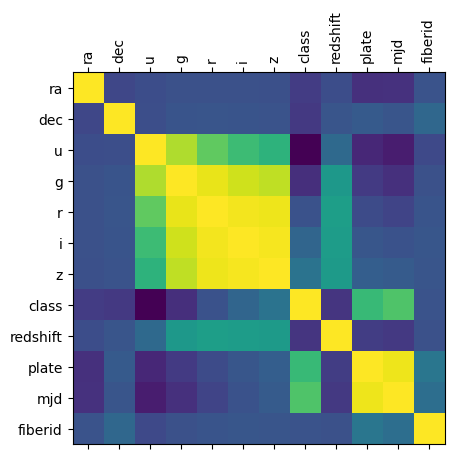

In [9]:
# Find the correlation between the features
correlation = df.corr()

# Plot the correlation matrix
plt.matshow(correlation)
plt.xticks(range(len(correlation.columns)), correlation.columns)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.xticks(rotation=90)
plt.show()

**Task: Plot the correlation matrix that can be called in the pandas dataframe. (2 points)**

Hints:

Use functions of ``heatmap``, add the labels in the axes. The colormap ``coolwarm`` is nice for divergent scales like correlations that vary between -1 and 1. The argument ``center=0`` ensures that the colormap is divergent from zero. Make sure to ignore the label column "class". Remember that dropping a column can be done in place ``sdss_df.drop('class', axis=1)``.

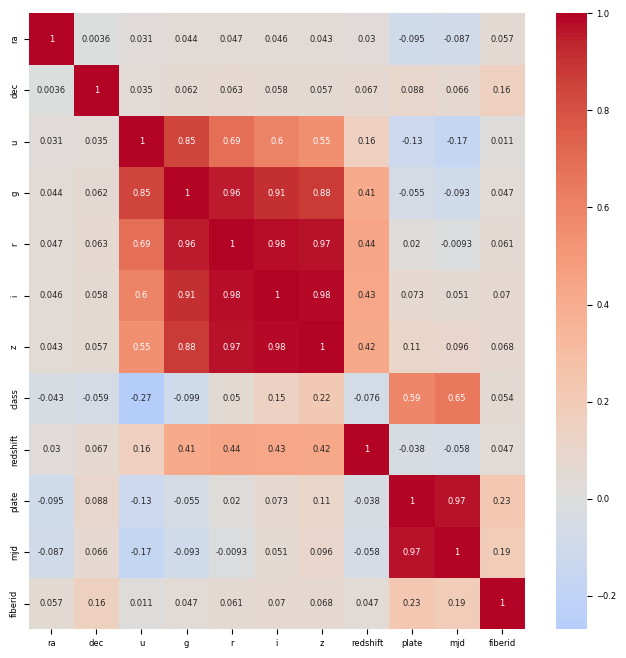

In [12]:
# Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 8))
correlation_ = correlation.drop('class', axis=1)
sns.heatmap(correlation_, annot=True, cmap='coolwarm', center=0)
plt.rcParams['font.size'] = 6
plt.show()

**Task: Reproduce the same plot for each of the three classes. (1 point)**
You can select the values from the pandas dataframe by selecting over the column 'class'. 

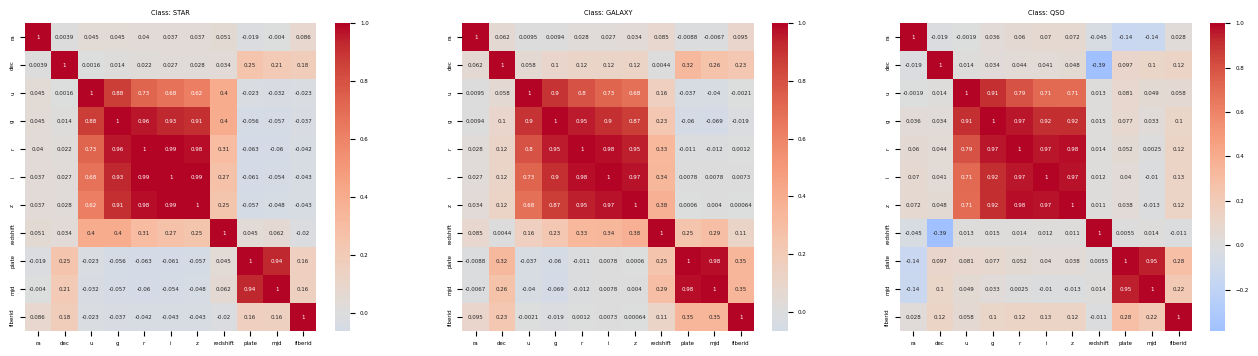

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
for i, c in enumerate(classes):
    df_class = df[df['class'] == i]
    df_class = df_class.drop(columns=['class'])
    correlation = df_class.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, ax=axs[i])
    axs[i].set_title(f"Class: {c}")
plt.show()

**Task: Can you comment on groups of observations that can be grouped together or that appear independent from each other given these correlations, and if there is any difference between the three celestial objects? (**1 point**)**

Answer: Based on the above correlation matrices, any observational category that has high correlation to another category can be narrowed down to use just one of them since they encode much of the same information. All of the information in the 'u', 'g', 'r', 'i', and 'z' features appears to share similar information across all three celestial objects, as does 'plate' and 'mjd'. There doesn't appear to be much of a difference between galaxies, stars, and quasars according to these correlation matrices, although the correlation factors do differ slighly.

### 1.5 Data exploration
Given the structure of the correlations, we will explore the values of the data.

#### 1.5.a. Distributions of redshift
"redshifting" happens when the source of light is becoming more distant to the receiver: the object is moving away from Earth. 

**Task: plot histograms for the 'redshift' feature column for each class (1 point).**

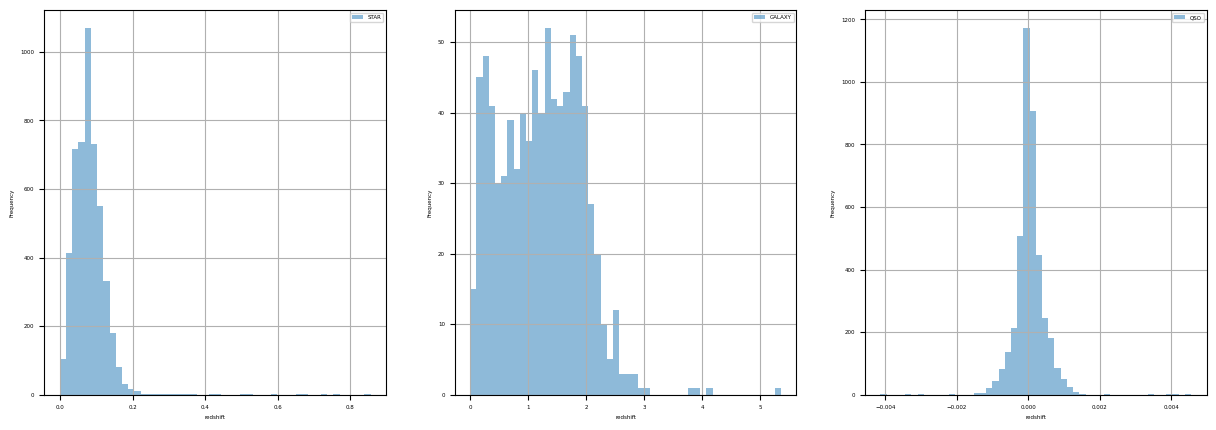

In [22]:
# Plot histograms for the 'redshift' feature for each of the three classes on three plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, c in enumerate(classes):
    df_class = df[df['class'] == i]
    axs[i].hist(df_class['redshift'], bins=50, alpha=0.5, label=c)
    axs[i].legend()
    axs[i].set_xlabel('redshift')
    axs[i].set_ylabel('Frequency')
    axs[i].grid()
plt.show()

**Task : Describe briefly the difference between the three histograms. (0.5 point)**

<!-- # answer -->
* **Star:** Stars see a lot of small, positive redshift values.

* **Galaxy:** Galaxies cover a broad range of positive redshift values and don't seem to concentrate near any particular mean.

* **QSO:** The redshift values are all frequently near small positive and negative values, but are centered on zero.


#### 1.5.b. Right ascension (ra) and declination (dec) 

We will now plot the right ascension versus the declination depending on the class. You can use the ``lmplot`` function in ``seaborn`` (https://seaborn.pydata.org/generated/seaborn.lmplot.html) to represent the sky view of these objects.

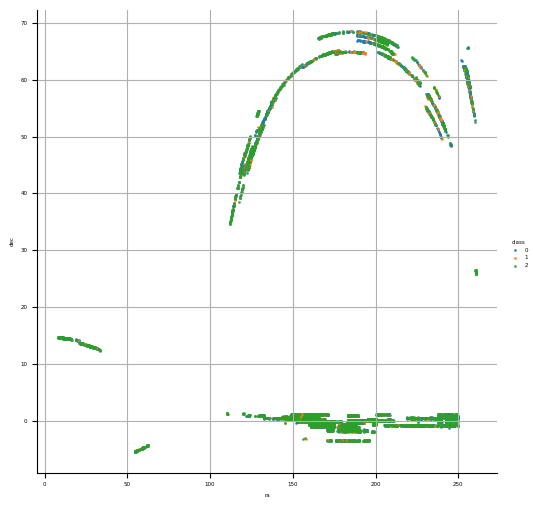

In [23]:
# Plot the right ascension versus declination
sns.lmplot(x='ra', y='dec', data=df, hue='class', fit_reg=False, scatter_kws={'s': 1})
plt.grid()
plt.show()

**Task: do you see any obvious differences such that one could easily discriminate between the two coordinates? (0.5 point)**

Answer: There are no obvious differences to easily discriminate between the two corrdinates.

#### 1.5.c Filters - u,g,r,i,z 

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations. According to the correlation matrix, they are correlated for all three classes.

Therefore it is interesting to see that band 'u' is less correlated to the other bands. 

**Task Plot histograms and discuss why you expect these features to be correlated (1 points)**

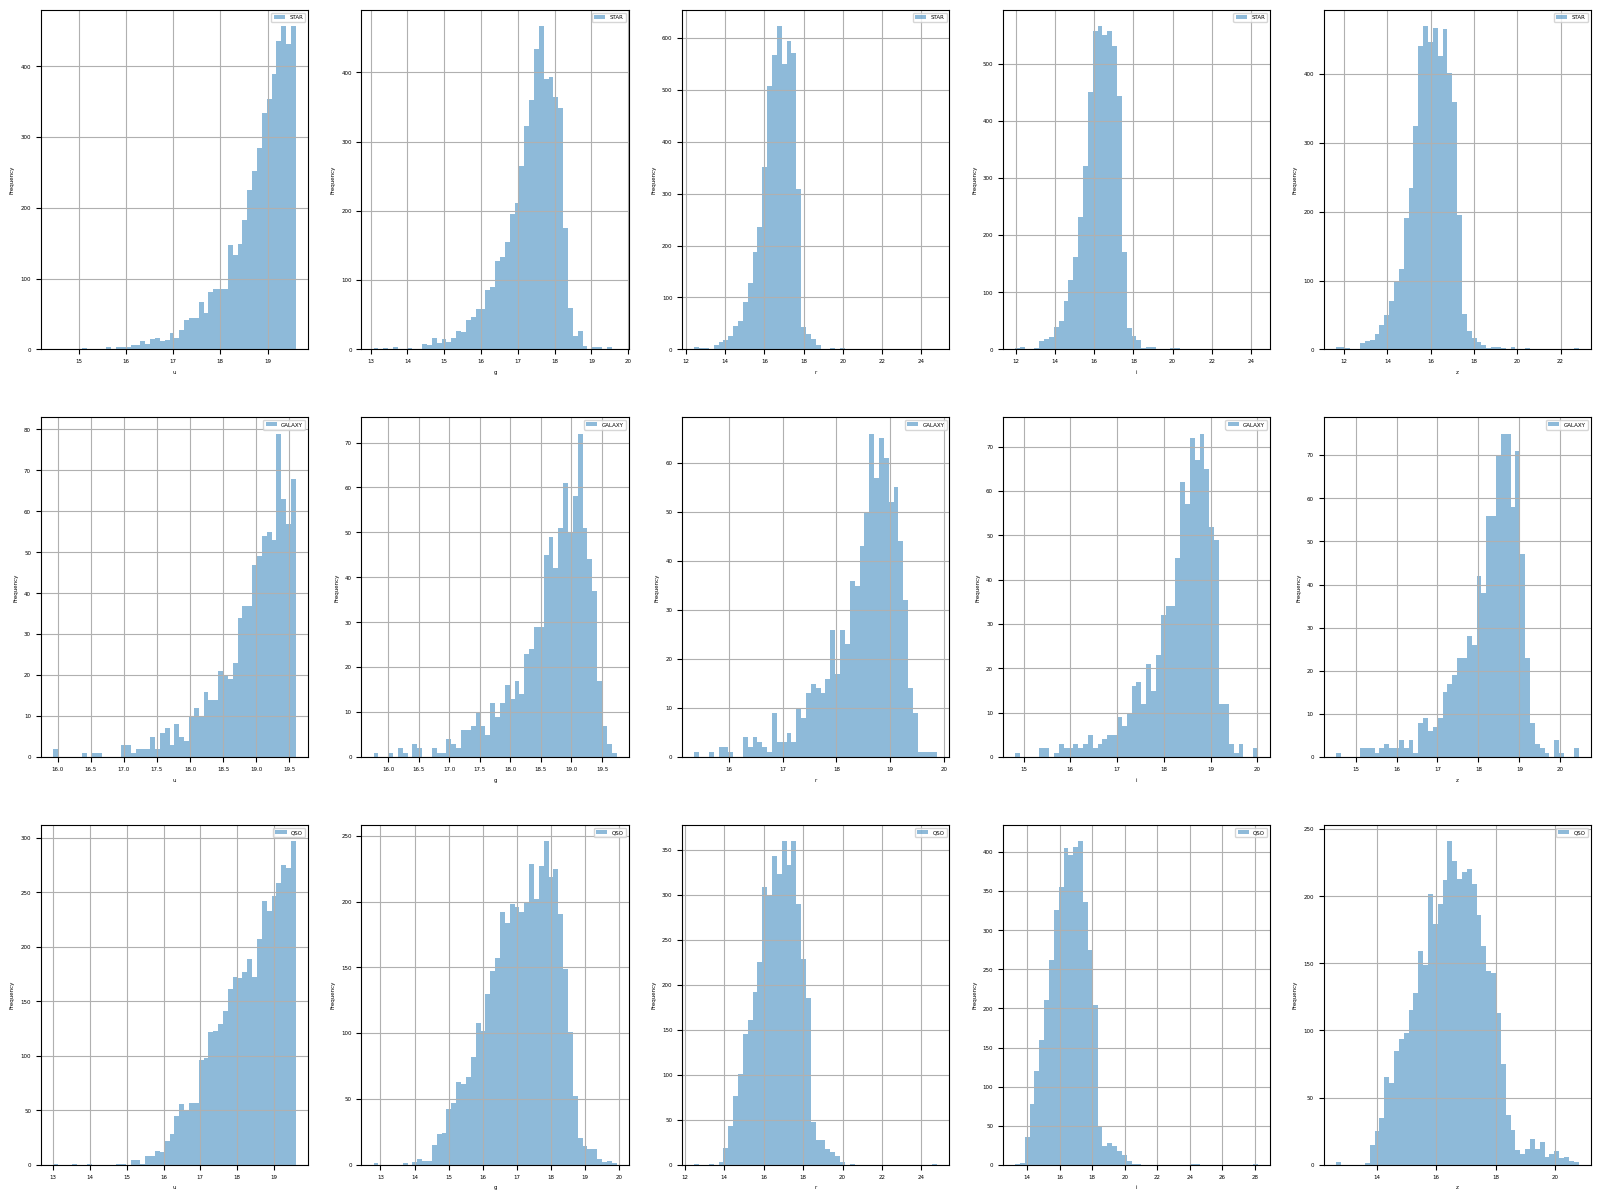

In [24]:
# Plot histograms for the 'u', 'g', 'r', 'i', and 'z' features
fig, axs = plt.subplots(3, 5, figsize=(20, 15))

for i, c in enumerate(classes):
    df_class = df[df['class'] == i]

    for j, band in enumerate(['u', 'g', 'r', 'i', 'z']):
        axs[i, j].hist(df_class[band], bins=50, alpha=0.5, label=c)
        axs[i, j].legend()
        axs[i, j].set_xlabel(band)
        axs[i, j].set_ylabel('Frequency')
        axs[i, j].grid()
plt.show()

### 1.6 Data Dimensionality Reduction
At this point, we are left with 8 features: redshift, u, g, r, i, z, ra, and dec. Among these, the filters (u, g, r, i, z) are correlated to each other. There is therefore a potential for reducing the dimensions of the features using PCA on these 5 features.

We will use the skilearn function ``sklearn.decomposition.PCA()`` to fit and transform the data into the PC coordinates. Lets' first explore how many PCs we need. Fit the PCA function over the total number of filters. You will fit the PCA function over an array with the columns selected from the dataframe. 

**Task: Perform the PCA over a max number of PCs, output the explained variance ratio values, decide on an appropriate maximum number of PC to use (6 points)**

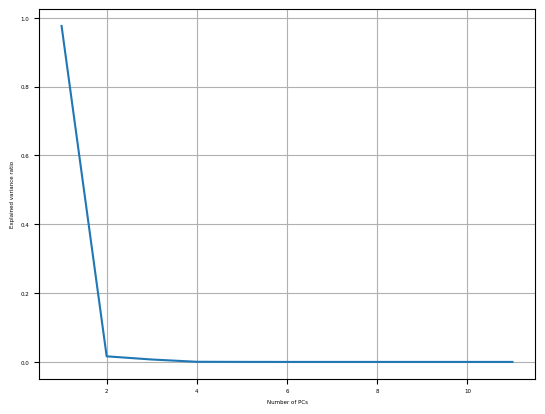

In [25]:
# Perform PCA over max number of PCs, output the explained variance ratio values
from sklearn.decomposition import PCA

pca = PCA(n_components=n_features-1)
pca.fit(df.drop('class', axis=1))
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio values
plt.plot(range(1, n_features), explained_variance_ratio)
plt.xlabel('Number of PCs')
plt.ylabel('Explained variance ratio')
plt.grid()
plt.show()

*Answer on how many PCs to use*



Answer: Use 2 PCs

We will now re-perform PCA with the number of PCs you found is most appropriate. Re-apply the fit-transform function. Update the dataframe by adding the PCA value(s) and dropping the columns of the 5 filter features.

**Task: PCA again, fit and transform, update the dataframe with the new feature(s) (3 points)**

In [26]:
# Re-perform PCA with 2 PCs
pca = PCA(n_components=2)
pca.fit(df.drop('class', axis=1))
df_pca = pd.DataFrame(pca.transform(df.drop('class', axis=1)), columns=['PC1', 'PC2'])
df_pca['class'] = df['class']
df_pca.head()

,PC1,PC2,class
0,2687.378102,-307.404358,2
1,-1721.936981,320.678448,2
2,-1487.679117,-15.207264,0
3,2687.743346,-303.955949,2
4,2687.781948,-303.592105,2


## 2. Unsupervised Clustering with KMeans (20 points)

In this section, we will explore if the data features will be sufficient for classification. As a first exploration, we will perform unsupervised classification with Kmeans clustering.

## 2.1 Perform preliminary Kmeans (10 points)

Implement Kmeans here for a given number of clusters and on the features of interest. Choose 3 features.
* Use ``sklearn`` to perform Kmeans.
* Repeat Kmeans and discuss (in a markdown cell) the stability of clustering (e.g., use visualization to qualitatively assess the stability).


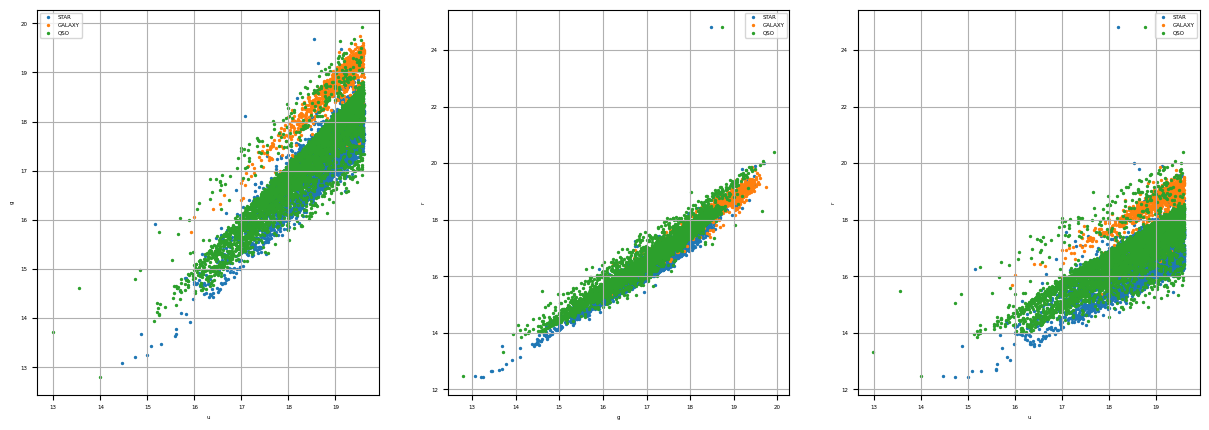

In [27]:
# Use Kmeans clustering on the 'u', 'g', and 'r' features
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['u', 'g', 'r']])
df['cluster'] = kmeans.labels_

# Plot the clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, c in enumerate(classes):
    df_class = df[df['class'] == i]
    axs[0].scatter(df_class['u'], df_class['g'], label=c, s=2)
    axs[1].scatter(df_class['g'], df_class['r'], label=c, s=2)
    axs[2].scatter(df_class['u'], df_class['r'], label=c, s=2)
axs[0].set_xlabel('u')
axs[0].set_ylabel('g')
axs[0].grid()
axs[0].legend()
axs[1].set_xlabel('g')
axs[1].set_ylabel('r')
axs[1].grid()
axs[1].legend()
axs[2].set_xlabel('u')
axs[2].set_ylabel('r')
axs[2].grid()
axs[2].legend()
plt.show()

Answer: The clustering seems relatively stable. Generally stars and galaxies appear well clustered, and quasars see more spread in their designated clusters across the chosen features.

## 2.2 Find the optimal number of clusters (5 points)

Use a method to establish the optimal number of clusters.

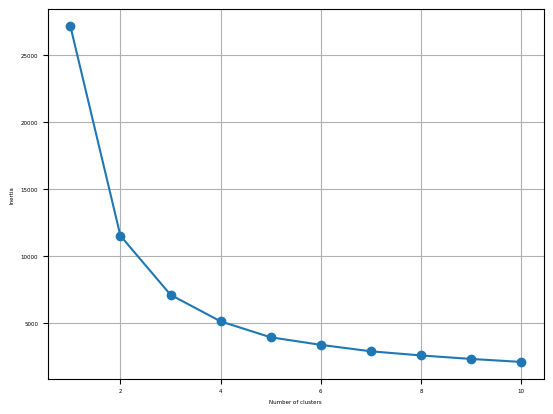

In [28]:
# Find the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['u', 'g', 'r']])
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

## 2.3 Discuss performance of clustering ( 5 points)

1. Perform silhouette analysis (silhouette visualization and score)

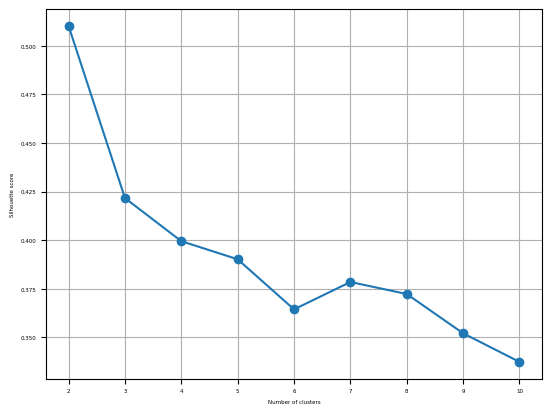

In [29]:
# Perform silhouette analysis and plot the silhouette score for each number of clusters
from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['u', 'g', 'r']])
    silhouette.append(silhouette_score(df[['u', 'g', 'r']], kmeans.labels_))
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

2. Calculate (python cell) and discuss (net markdown cell) homogeneity with respect to the ground truth labels using 3 appropriate metrics.

In [31]:
# Calculate some metrics, add Fowlkes-Mallows index
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score

print(f"Homogeneity: {homogeneity_score(df['class'], df['cluster'])}")
print(f"Completeness: {completeness_score(df['class'], df['cluster'])}")
print(f"V-measure: {v_measure_score(df['class'], df['cluster'])}")
print(f"Fowlkes-Mallows index: {fowlkes_mallows_score(df['class'], df['cluster'])}")

Homogeneity: 0.09120294196015023
Completeness: 0.08003256576105855
V-measure: 0.08525340972985207
Fowlkes-Mallows index: 0.43094013131102604


**Question:** After performing KMeans clustering and calculating the completeness, homogeneity, and Fowlkes-Mallows scores, how can you determine if these scores are good? Compare the obtained scores to the ideal values and explain what each score indicates about the clustering quality. What do you find from your results?

Answer:

**Homogeneity:**

Ideal Value: 1.0

Result: 0.091, which is quite low, indicates that the clusters are not well-purified by class and that there is significant mixing of classes within clusters.

**Completeness**:

Ideal Value: 1.0

Result: 0.080, another low score, implies that members of the same class are spread across multiple clusters, showing that the clustering model didn’t effectively group them together.

**V-measure**:

Ideal Value: 1.0

Result: 0.085, which is close to the individual homogeneity and completeness scores, suggests that the clustering poorly separates classes, without grouping class members effectively.

**Fowlkes-Mallows Index:**

Ideal Value: 1.0

Result: 0.431, which is moderate, shows some degree of alignment between clusters and classes, but not enough to indicate strong clustering quality.

From these results, is can be seen that the clustering produced by KMeans does not closely align with the true class labels. The low values of homogeneity, completeness, and V-measure indicate that the clusters do not accurately represent class boundaries or groupings, suggesting poor clustering quality. The moderate Fowlkes-Mallows score shows some, albeit weak, overlap with the true classes, but it does not indicate satisfactory clustering performance.

## 3 Machine Learning Models (30 points)

We will now train different models on this dataset. We have a total of 8 features, 3 classes, and 10,000 samples. We will use K-Nearest Neighbors, Naive Bayes, Random Forest, Support Vector Machine, Multi Layer Perceptron.

We now follow a normal machine learning workflow:
* Feature scaling (3) points)
* Train/test set split (2 points)
* Model design, training, testing (15 points)
* Model comparisons, pick your winner, discuss feature importance using Random Forest. (10 points)

### 3.1 Feature Scaling
Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster. You can scale the features only by dropping the "class" column without modifying the dataframe in place, using the pandas function ``drop()``.

**Task: Scale just the features (3 points)**

In [33]:
# Scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.drop('class', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns)
df_scaled['class'] = df['class']
df_scaled['cluster'] = df['cluster']
df_scaled.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid,cluster,class
0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.369731,1.031489,1.309311,0.668632,1,2
1,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.369849,-0.636213,-0.879197,0.911012,1,2
2,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.053027,-0.656339,-0.609191,0.775279,2,0
3,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.369993,1.031489,1.309311,0.760736,0,2
4,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.368189,1.031489,1.309311,0.770431,0,2


### 3.2 Test, train, validation data sets.
**Task: Split the data into a training and a test part.  (2 points)**

The models will be trained on the training data set and tested on the test data set

In [34]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['class', 'cluster'], axis=1)
y = df_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Computation time is important to account for when scaling up the data set and the model size. You can evaluate the relative computational time using the function ``time.perf_counter()`` to evaluate the absolute time. Then compare the computational time by making the difference between two time stamps:

``t1=time.perf_counter()``

``t2=time.perf_counter()``

``tcomp = t2 - t1``

We will also assess the model performance of these multi-class classifiers. We will evaluate the average of the scores over the 3 class labels.

In the following, we will be testing over several classifiers. Follow the steps:
1. model definition/design
2. training
3. prediction on test
4. evaluation: a) print the classification_report; b) save the precision, recall, fscore and accuracy in variables

### 3.3.a K Nearest Neighbors (3 points)
Check out the function arguments and definition here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [35]:
# Train a K Nearest Neighbors classifier and evaluate the model, keep track of time taken
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

start = time.time()
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print(f"Accuracy: {accuracy}")
print(f"Time taken: {end - start:.3f} seconds")

Accuracy: 0.914
Time taken: 0.078 seconds


### 3.3.b Naive Bayes (3 points)
Check out the sklearn tutorial pages here: https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes. We propose to use the Gaussian Naive Bayes.

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. For this example then we will use the unscaled data, then rescale it.

In [36]:
# Train a Naive Bayes classifier and evaluate the model, keep track of time taken
from sklearn.naive_bayes import GaussianNB

start = time.time()
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print(f"Accuracy: {accuracy}")
print(f"Time taken: {end - start:.3f} seconds")

Accuracy: 0.9705
Time taken: 0.005 seconds


### 3.3.c Random Forest Classifier (2 points)
Check out the tutorial page here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [37]:
# Train a Random Forest classifier and evaluate the model, keep track of time taken
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print(f"Accuracy: {accuracy}")
print(f"Time taken: {end - start:.3f} seconds")

Accuracy: 0.9905
Time taken: 1.156 seconds


### 3.3.d Support Vector Machine Classifier (2 points)
Check out the sklearn information page here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [38]:
# Train a Support Vector Machine classifier and evaluate the model, keep track of time taken
from sklearn.svm import SVC

start = time.time()
svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print(f"Accuracy: {accuracy}")
print(f"Time taken: {end - start:.3f} seconds")

Accuracy: 0.964
Time taken: 0.382 seconds


### 3.3.e Multi-Layer Perceptron (3 points)

Check out the information page here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [39]:
# Train a Multi-Layer Perceptron classifier and evaluate the model, keep track of time taken
from sklearn.neural_network import MLPClassifier

start = time.time()
mlp = MLPClassifier(max_iter=1000)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
end = time.time()

print(f"Accuracy: {accuracy}")
print(f"Time taken: {end - start:.3f} seconds")

Accuracy: 0.985
Time taken: 3.271 seconds


### 3.4 Model performance and comparison 

### 3.4.a Confusion Matrix and interpretation

**Task: Plot the confusion matrix (2 points)**

Use sklearn ``ConfusionMatrixDisplay" from the sklearn to visualize the confusion matrix

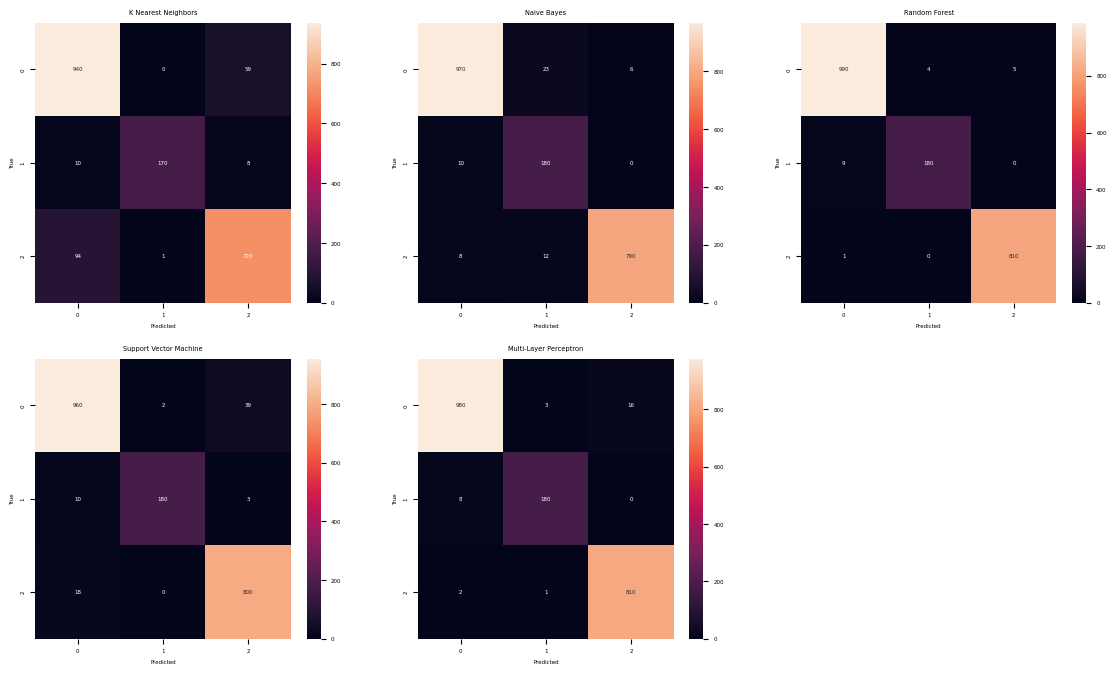

In [40]:
# Plot the confusion matrix for all the models
from sklearn.metrics import confusion_matrix
import seaborn as sns

models = [knn, nb, rf, svc, mlp]
model_names = ['K Nearest Neighbors', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'Multi-Layer Perceptron']

fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs = axs.flat
for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, ax=axs[i])

    for t in axs[i].texts:
        t.set_text(f"{int(float(t.get_text())):d}")
        
    axs[i].set_title(model_names[i])
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('True')

fig.delaxes(axs[-1])
plt.show()

**Task: Comment on what you see the best classifier is likely to be (1 point).** You can also comment on the misclassification and confusion rates.

Answer: The best classifiers are likely Random Forest and MLP. They have lower misclassifications as shown in the confusion matrix rates.

### 3.4.a K Fold Cross Validation
We will now perform k fold cross valdiation for the classifiers. We use the function ``cross_val_score`` on each ewstimator, on the training set, with 10 folds, and use accuracy as a score metric.

**Task: perform the cross validation over K folds, output the mean and standard deviation of the accuracy (3 points)**

In [41]:
# Perform the cross validation over K folds on all models
from sklearn.model_selection import cross_val_score

models = [knn, nb, rf, svc, mlp]
model_names = ['K Nearest Neighbors', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'Multi-Layer Perceptron']

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Model: {model_names[i]}")
    print(f"Mean accuracy: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")
    print()

Model: K Nearest Neighbors
Mean accuracy: 0.9132999999999999
Standard deviation: 0.012901937838944999

Model: Naive Bayes
Mean accuracy: 0.9703000000000002
Standard deviation: 0.010661144403862096

Model: Random Forest
Mean accuracy: 0.9888
Standard deviation: 0.0032341923257592537

Model: Support Vector Machine
Mean accuracy: 0.9642
Standard deviation: 0.008652167358529299

Model: Multi-Layer Perceptron
Mean accuracy: 0.9873
Standard deviation: 0.0027129319932501024



**Task: Which method won the Xval test (1 point) ?**

Answer: Random Forest won the cross-validation test.

### 3.4.c And the winner is ...

Let's compare the results. 
**Task: Create a pandas dataframe with all of the performance metrics, including the results from K-fold cross validation. (2 points)**

In [42]:
# Create a pandas dataframe to store the performance results
models = [knn, nb, rf, svc, mlp]
model_names = ['K Nearest Neighbors', 'Naive Bayes', 'Random Forest', 'Support Vector Machine', 'Multi-Layer Perceptron']

# Create a list to store performance results
performance_data = []

for i, model in enumerate(models):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    end = time.time()

    scores = cross_val_score(model, X, y, cv=5)
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()

    # Append results as a dictionary
    performance_data.append({
        'Model': model_names[i],
        'Accuracy': accuracy,
        'Time taken': end - start,
        'Mean accuracy': mean_accuracy,
        'Standard deviation': std_accuracy
    })

# Convert list of dictionaries to a DataFrame
performance = pd.DataFrame(performance_data)
performance

,Model,Accuracy,Time taken,Mean accuracy,Standard deviation
0,K Nearest Neighbors,0.9140,0.073271,0.9133,0.012902
1,Naive Bayes,0.9705,0.002064,0.9703,0.010661
2,Random Forest,0.9895,1.139433,0.9887,0.002768
3,Support Vector Machine,0.9640,0.362729,0.9642,0.008652
4,Multi-Layer Perceptron,0.9845,3.143956,0.9880,0.002720


**Task: Comment on the accuracy and performance and choose a winner. (1 point)**

Answer: The model with the best accuracy was Random Forest. It also had the highest mean accuracy (just beat out MLP), with the lowest standard deviation. However, RF did take the second longest amount of time to run.

## 4 Summary (4 points)

### 4.1 Feature Importance using Random Forest Classifier

Decision Trees have the unique property of being able to order features by their ability to split between the classes. If some features dominate over other in the predictive power of classes, one can further reduce the dimension of the features for additional analysis. The vector of feature importance is the module ``rfc.feature_importances_``, sorted with ascending importance. Store the vector of importance .

**Task: plot a bar plot using the function ``matplotlib.pyplot.bar``. (2 points)**

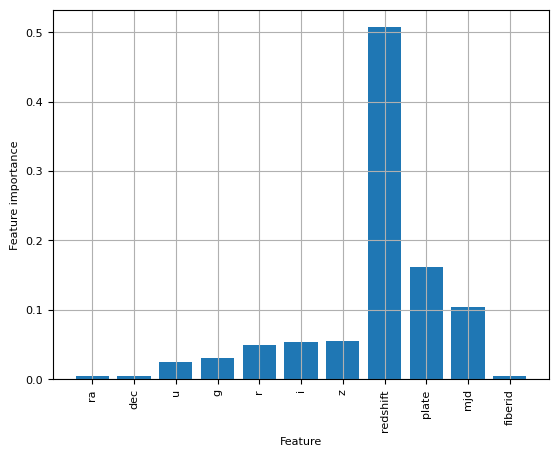

In [45]:
# Plot a bar plot feature importance
importances = rf.feature_importances_
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), X.columns, rotation=90)
plt.ylabel('Feature importance')
plt.xlabel('Feature')
plt.rcParams['font.size'] = 12
plt.grid()
plt.show()

**Task: What are the top three features (1 point)?**

Answer: The top three features are redshift, phase, and mjd.

In this notebook, you have learned that redshift was the best predictor of what object you are observing. Now, did you actualy need to do this all to find this out? Probably not if you were an astrophysicist! But hey, we are not. So great job!

**Task: Briefly comment on what you have learned (1 point)**

This notebook showed me how important feature analysis is. Once the important features, or features that separately tell us the critical information, were deciphered then the model analysis not only simplified in complexity due to less input training/testing data, but was also able to perform better due to removal of redundant or unecessary information. Regardless of the scientific pursuit, feature exploration and selecting the best model for the chosen purpose are important steps for classic machine learning.

<!-- answer -->